# Nhóm 5
# Lâm Thanh Vi - K224141744 - Nhóm trưởng
# Phạm Thụy Phương Dung - K224141715
# Đoàn Tuấn Nghĩa - K224141730
# Nguyễn Sơn Trường - K224141742
# Lê Nguyễn Tường Vy - K224141746

## **Import Data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib import pyplot as plt
# Ignoring warnings
warnings.filterwarnings('ignore')

# Import data
url = 'https://drive.google.com/file/d/1lYD9C1Ke1xbDd0UVb4ChpFDqTtZUhnmJ/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## **Data processing**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

## **Normal distribution chart**

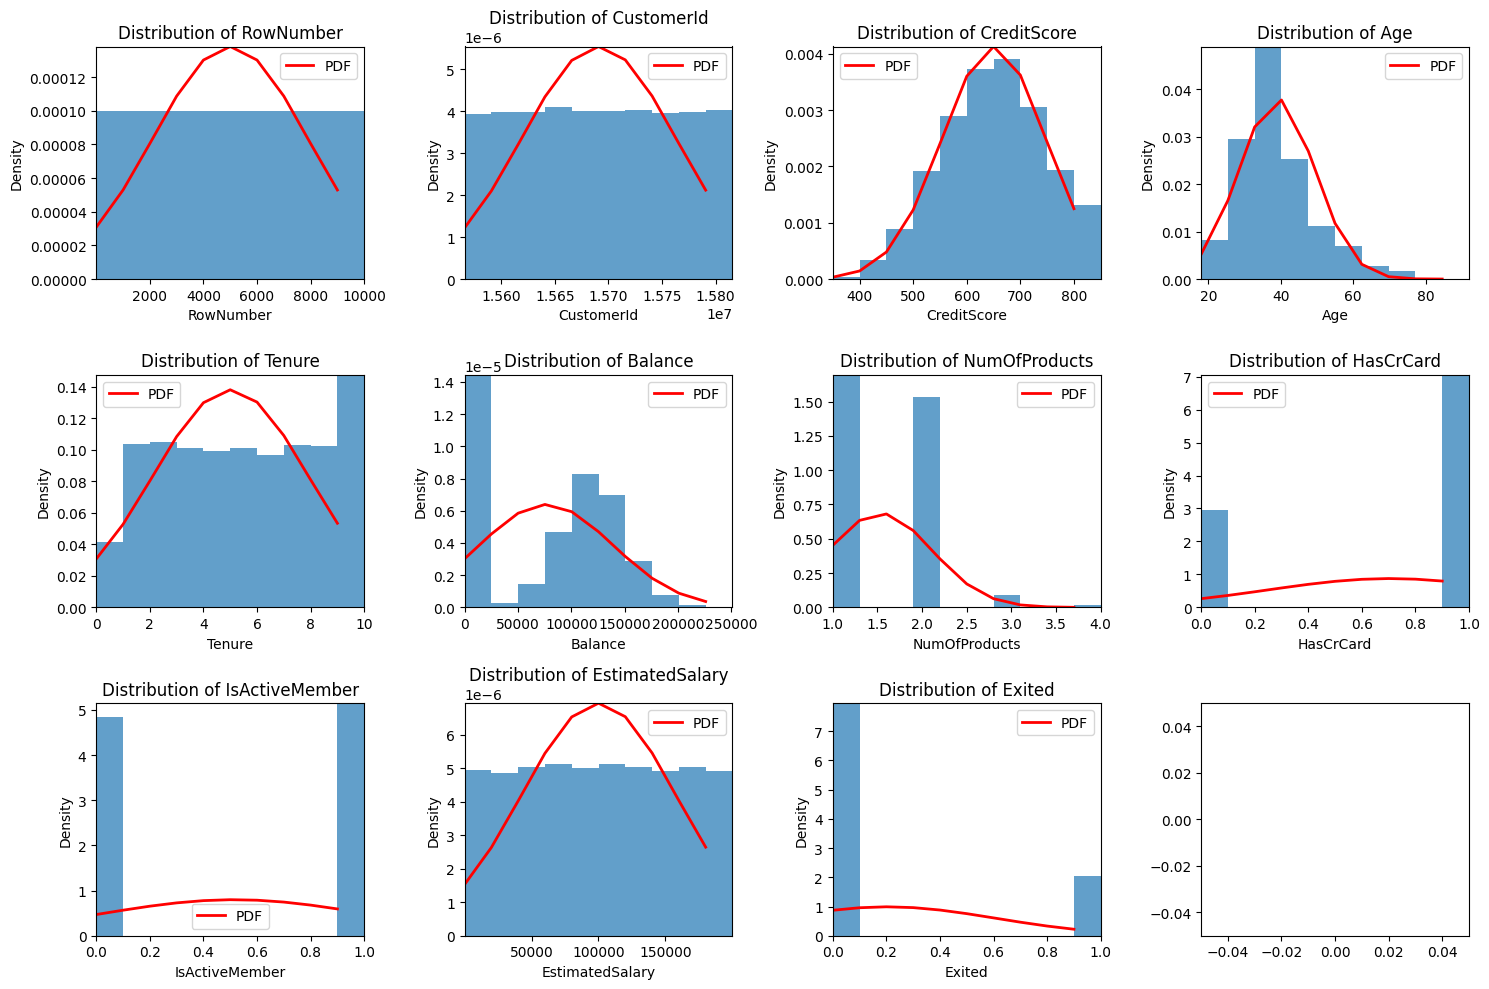

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Identify Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Generate Plots for Numerical Columns
nrows = int(np.ceil(len(numerical_columns) / 4))
ncols = min(4, len(numerical_columns))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < len(numerical_columns):
        column_name = numerical_columns[i]
        column_data = df[column_name]  # Use 'df' instead of 'data'

        if np.isnan(column_data).any():
            # Handle NaNs if present
            pass

        n, bins, patches = ax.hist(column_data, density=True, alpha=0.7)
        mu = column_data.mean()  # Calculate mean
        std = column_data.std()  # Calculate standard deviation
        ax.plot(bins[:-1], norm.pdf(bins[:-1], loc=mu, scale=std),
                linewidth=2, color='r', label='PDF')
        ax.set_xlabel(column_name)
        ax.set_ylabel('Density')
        ax.set_title(f'Distribution of {column_name}')
        ax.legend()
    ax.margins(0)
plt.tight_layout()

# ... (rest of the code for categorical columns remains the same)

# Display Plots
plt.show()

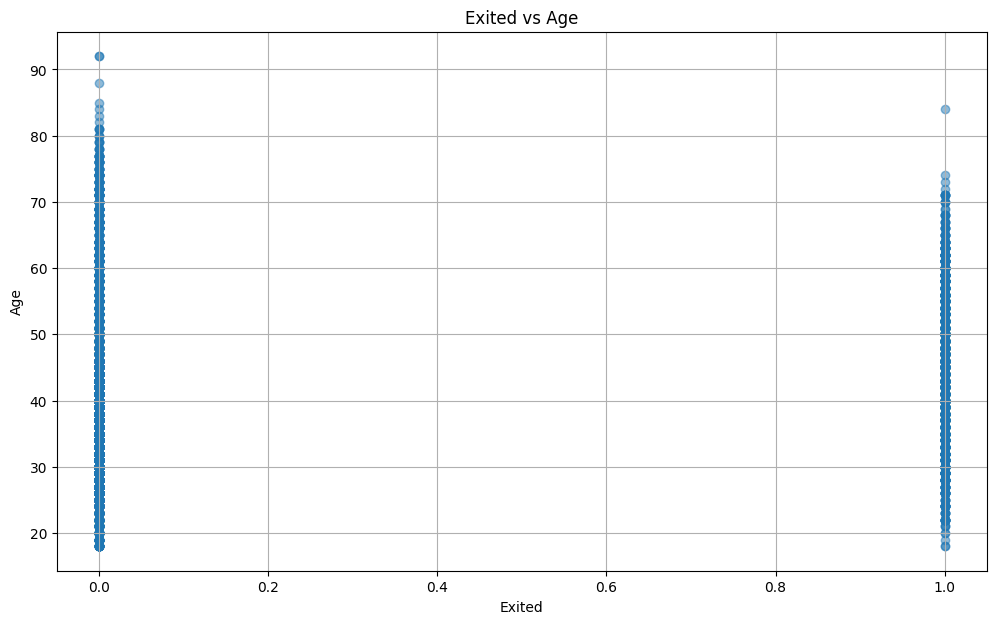

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a scatter plot of 'Exited' vs 'Age'
plt.figure(figsize=(12, 7))
plt.scatter(df['Exited'], df['Age'], alpha=0.5)
plt.title('Exited vs Age')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.grid()
plt.show()

## **Data cleaning**

In [8]:
# Xóa 3 cột: RowNumber, CustomerID, Surname
df = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [9]:
# Kiểm tra cột Balance
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [10]:
# Thay thế các giá trị 0 bằng giá trị mean
df['Balance'].replace(0, round(df.Balance.mean(),2), inplace=True)
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2   76485.89              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1   76485.89              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5   76485.89              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7   76485.89              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [11]:
## Kiểm tra các giá trị bị thiếu
for i in df.columns:
    print("Feature",i,"has",df[i].isna().sum(),"missing values.")
    print('---'*20)

Feature CreditScore has 0 missing values.
------------------------------------------------------------
Feature Geography has 0 missing values.
------------------------------------------------------------
Feature Gender has 0 missing values.
------------------------------------------------------------
Feature Age has 0 missing values.
------------------------------------------------------------
Feature Tenure has 0 missing values.
------------------------------------------------------------
Feature Balance has 0 missing values.
------------------------------------------------------------
Feature NumOfProducts has 0 missing values.
------------------------------------------------------------
Feature HasCrCard has 0 missing values.
------------------------------------------------------------
Feature IsActiveMember has 0 missing values.
------------------------------------------------------------
Feature EstimatedSalary has 0 missing values.
------------------------------------------------

In [12]:
## Loại bỏ các giá trị trùng lắp
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 80)

Duplicated values dropped succesfully
********************************************************************************


## **Categorical and Continuous Variables**

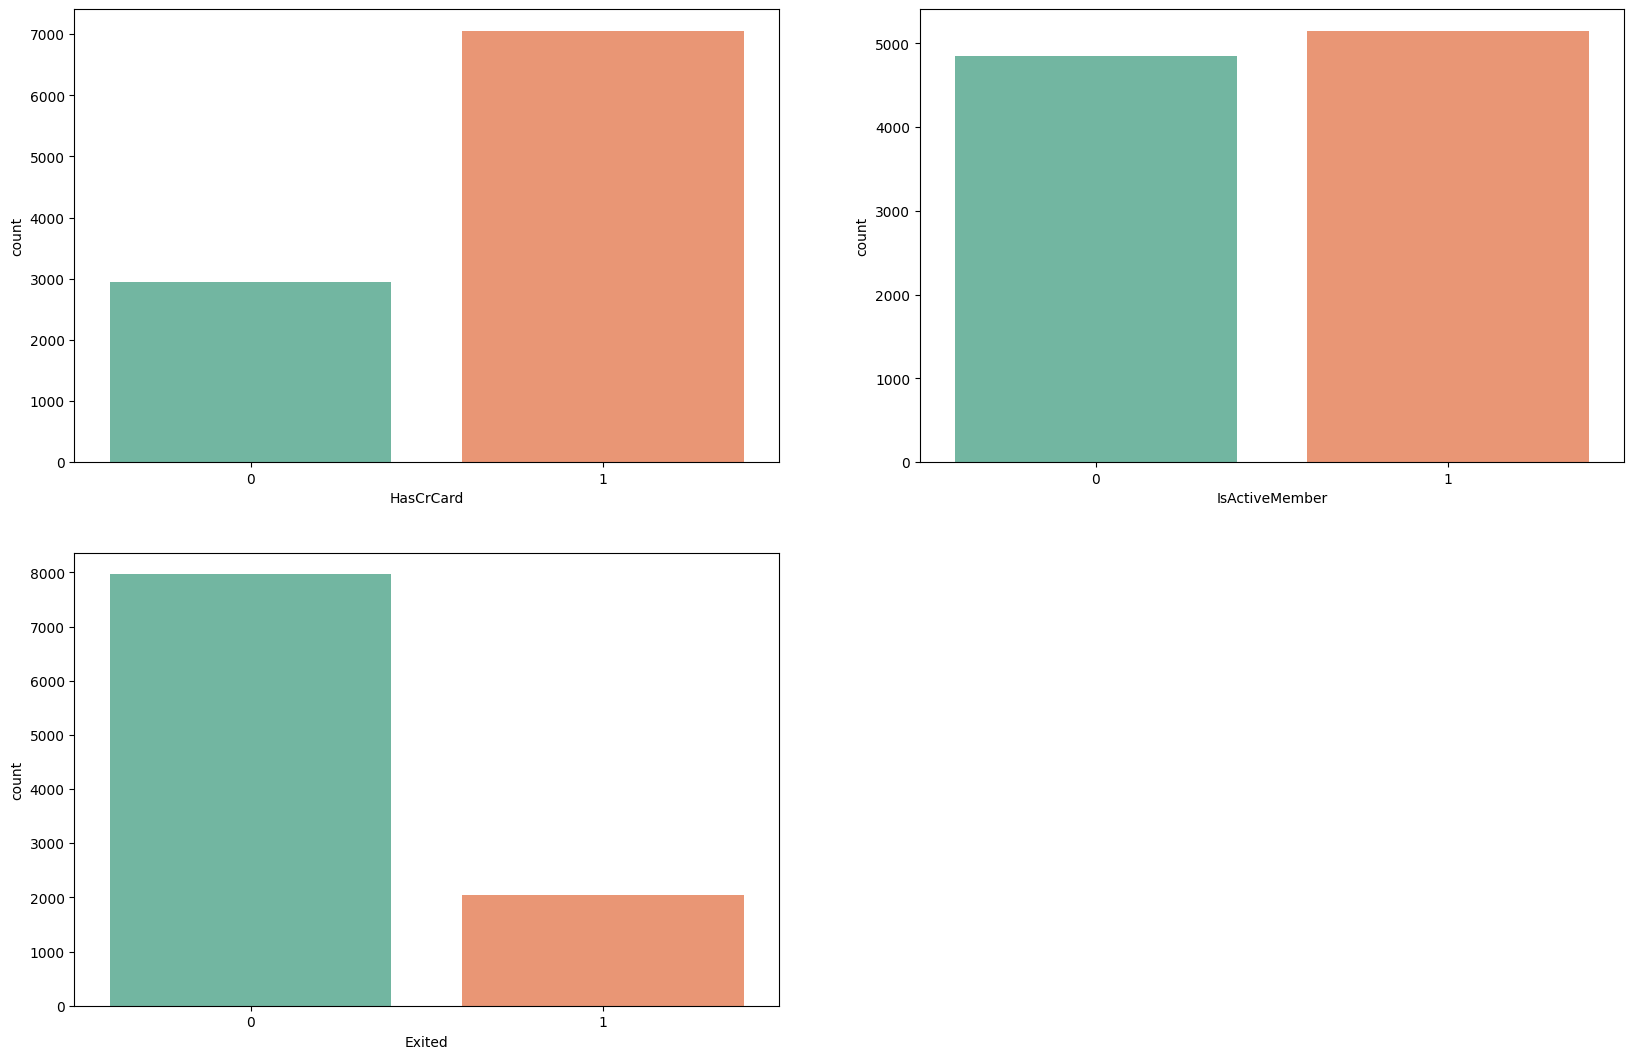

In [13]:
Categorical_list = ['HasCrCard', 'IsActiveMember', 'Exited']
plt.figure(figsize = (20,20)) # size bảng 20*20
for i in range(len(Categorical_list)): #length = 5 0->4
    plt.subplot(3,2,i+1)
    sns.countplot(x = Categorical_list[i], palette='Set2', data = df)

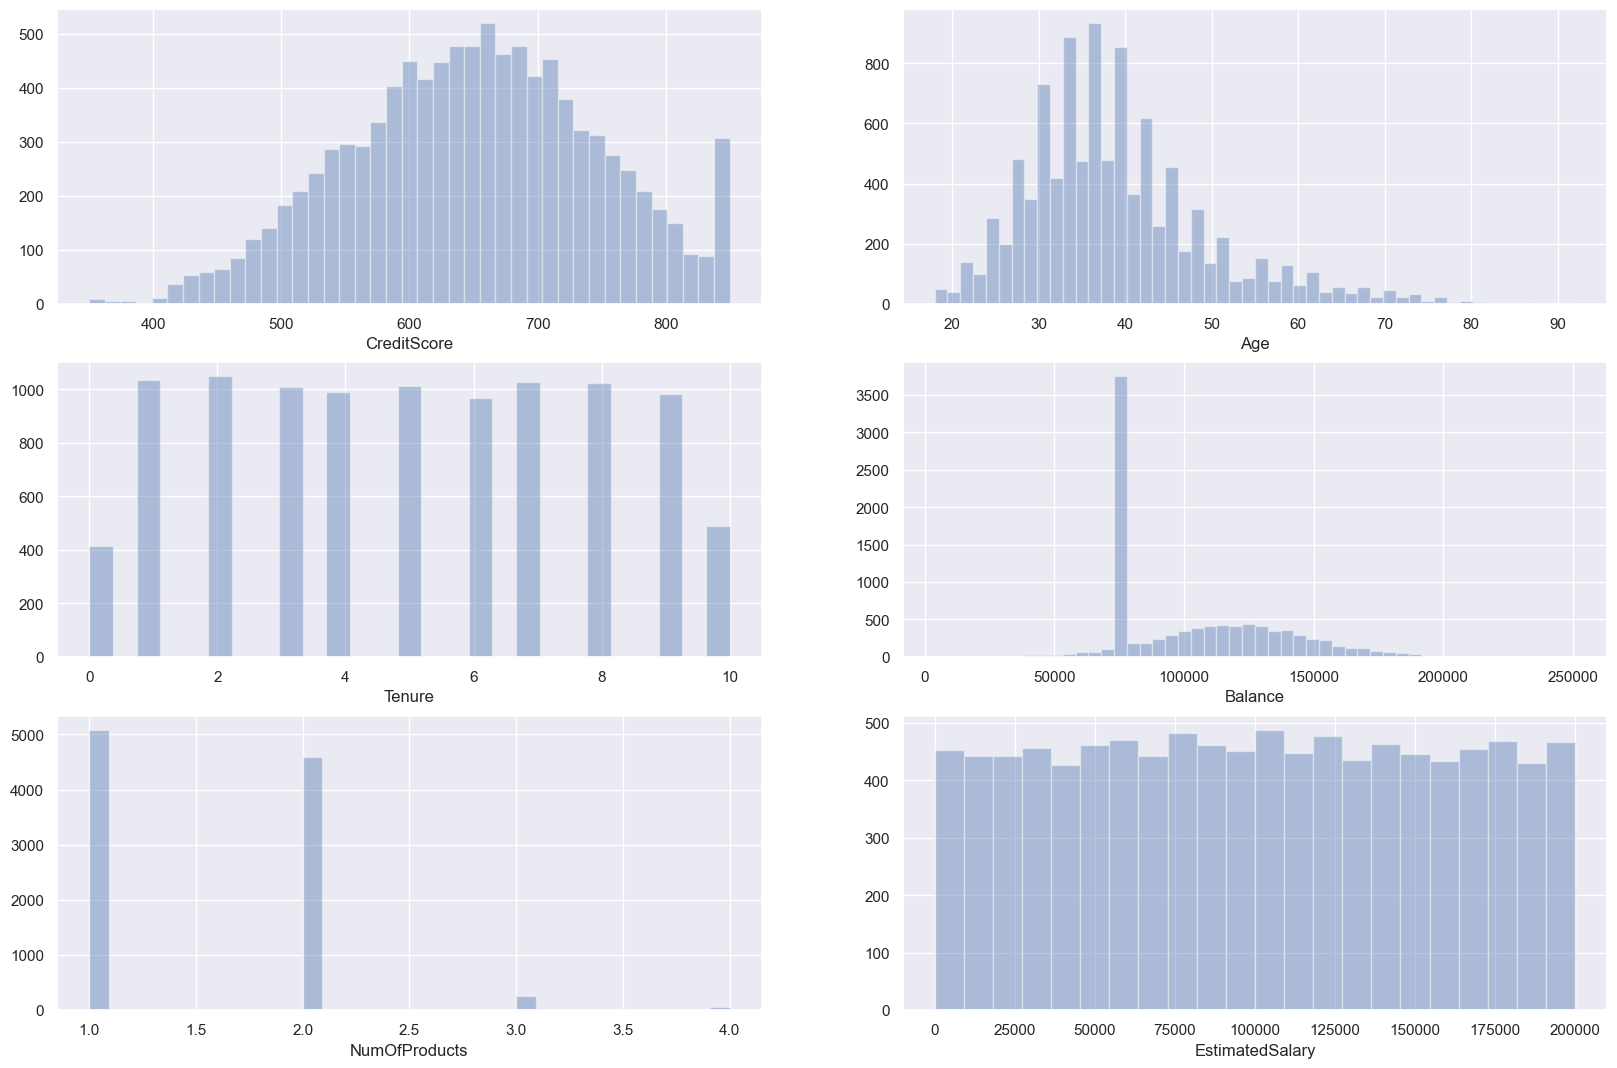

In [14]:
Continuous_list = ['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']
# chỉnh kích thước và màu sắc
plt.figure(figsize = (20,13))
sns.set(color_codes = True)

# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
for i in range(len(Continuous_list)):
    plt.subplot(3,2,i+1)
    sns.distplot(df[Continuous_list[i]], kde = False)

## **Finding outliers**

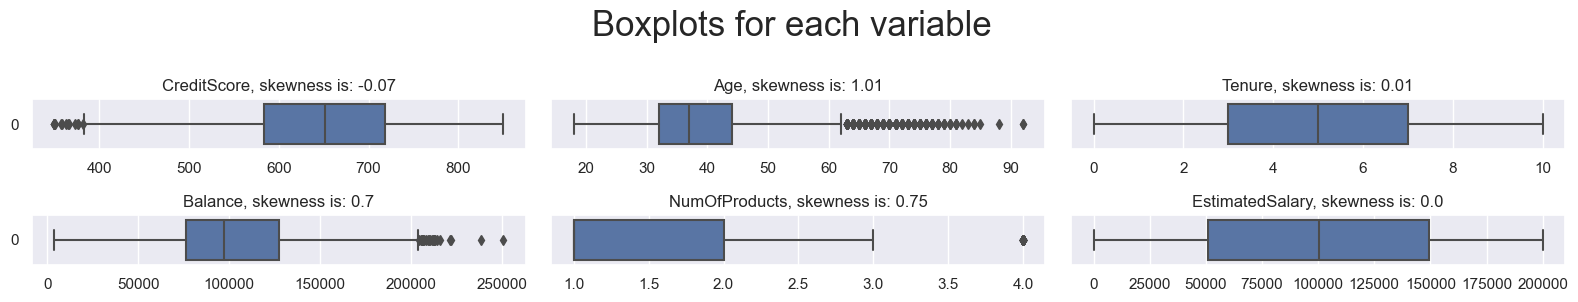

In [15]:
numeric_columns = (list(df.loc[:, Continuous_list]))
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3,suptitle='Boxplots for each variable')
plt.tight_layout()

## **Handling outliers**

In [16]:
# Xử lý các ngoại lệ bằng phân phối chuẩn
from scipy import stats
print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array ([True] * len(df))

for col in Continuous_list:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = filtered_entries & (zscore < 3)
df = df[filtered_entries]
print("Number of rows after filtering outliers:",len(df))

Number of rows before filtering outliers: 10000
Number of rows after filtering outliers: 9763


In [17]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2   76485.89              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1   76485.89              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5   76485.89              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7   76485.89              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[9763 rows x 11 columns]

## **Checking remaining outliers**

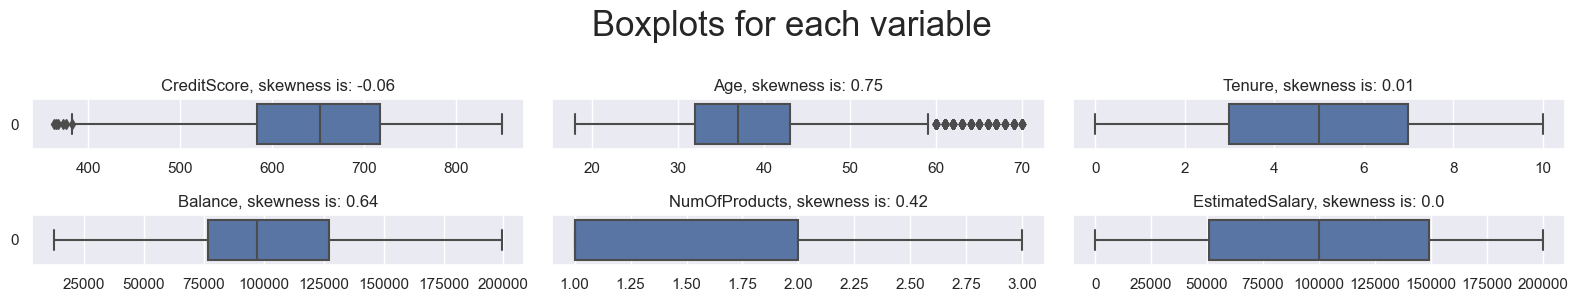

In [18]:
# Các ngoại lệ (outliers) chưa được loại bỏ là những outliers không tuân theo phân phối chuẩn
numeric_columns = (list(df.loc[:, Continuous_list]))
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3,suptitle='Boxplots for each variable')
plt.tight_layout()

## **Handling outliers by another way**

In [19]:
# Loại bỏ các giá trị outliers của cột Age (những giá trị lớn hơn 60)
outliers_age = df[df['Age'] > 60]
df = df.drop(outliers_age.index)
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2   76485.89              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1   76485.89              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5   76485.89              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7   76485.89              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[9434 rows x 11 columns]

<Axes: >

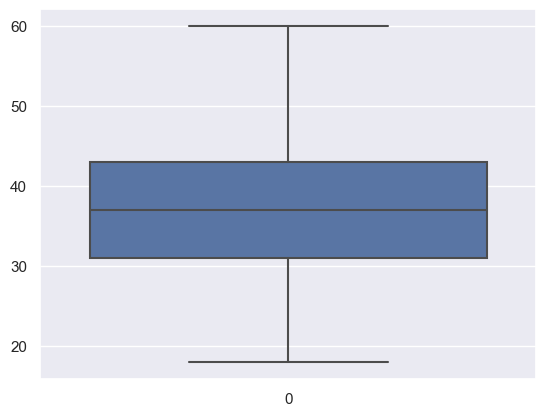

In [20]:
# Vẽ Boxplot của cột Age
sns.boxplot(df['Age'])

In [21]:
# Loại bỏ các ngoại lệ của cột CreditScore (những cột có giá trị nhỏ hơn 400)
outliers_crescore = df[df['CreditScore'] < 400]
df = df.drop(outliers_crescore.index)
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2   76485.89              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1   76485.89              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5   76485.89              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7   76485.89              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[9424 rows x 11 columns]

<Axes: >

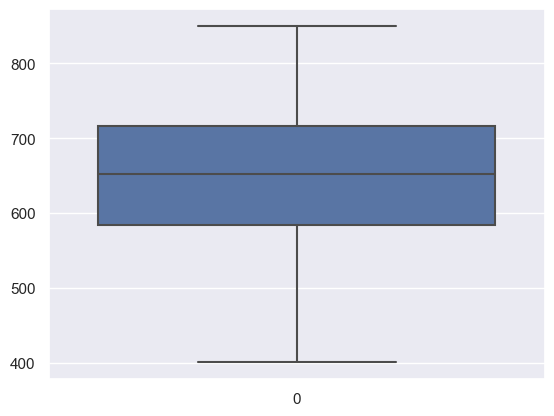

In [22]:
# Vẽ boxplot cột CreditScore
sns.boxplot(df['CreditScore'])

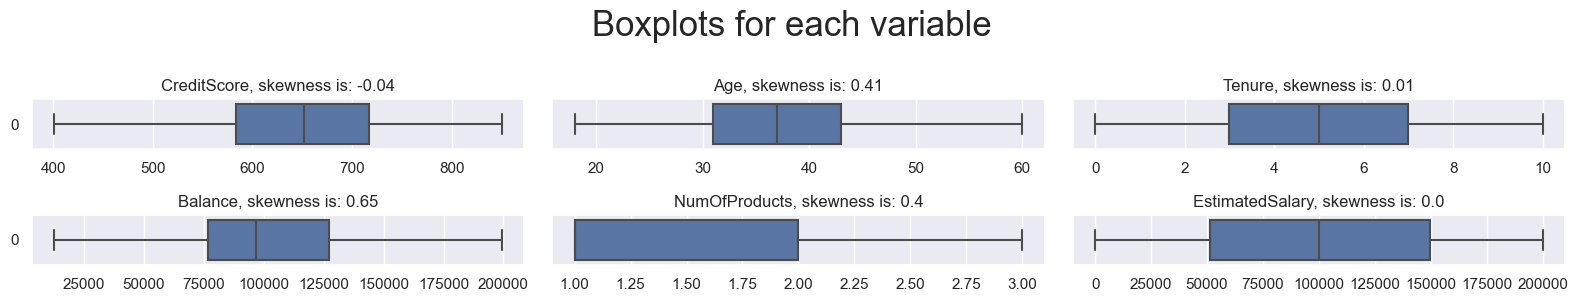

In [23]:
# Vẽ Boxplot của từng giá trị để check outliers lần cuối
numeric_columns = (list(df.loc[:, Continuous_list]))
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3,suptitle='Boxplots for each variable')
plt.tight_layout()

## **Data Transformation**

In [24]:
# Chuẩn hoá dữ liệu (phương pháp Standardization)
# Chia tỷ lệ dữ liệu số
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Balance', 'EstimatedSalary']])
df

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0       -0.332570    France  Female   42       2 -0.873477              1   
1       -0.447306     Spain  Female   41       1 -0.638892              1   
2       -1.552940    France  Female   42       8  1.791320              3   
3        0.501871    France  Female   39       1 -0.873477              2   
4        2.076878     Spain  Female   43       2  0.697207              1   
...           ...       ...     ...  ...     ...       ...            ...   
9995     1.252868    France    Male   39       5 -0.873477              2   
9996    -1.406913    France    Male   35      10 -1.485933              1   
9997     0.606176    France  Female   36       7 -0.873477              1   
9998     1.263298   Germany    Male   42       3 -0.918670              2   
9999     1.471908    France  Female   28       4  0.845608              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1         0.022100       1  
1             0               1         0.216669       0  
2             1               0         0.240812       1  
3             0               0        -0.108651       0  
4             1               1        -0.364905       0  
...         ...             ...              ...     ...  
9995          1               0        -0.066169       0  
9996          1               1         0.028199       0  
9997          0               1        -1.008012       1  
9998          1               0        -0.124957       1  
9999          1               0        -1.075711       0  

[9424 rows x 11 columns]

In [25]:
# Chuyển đổi dữ liệu phân loại thành dữ liệu số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0       -0.332570          0       0   42       2 -0.873477              1   
1       -0.447306          2       0   41       1 -0.638892              1   
2       -1.552940          0       0   42       8  1.791320              3   
3        0.501871          0       0   39       1 -0.873477              2   
4        2.076878          2       0   43       2  0.697207              1   
...           ...        ...     ...  ...     ...       ...            ...   
9995     1.252868          0       1   39       5 -0.873477              2   
9996    -1.406913          0       1   35      10 -1.485933              1   
9997     0.606176          0       0   36       7 -0.873477              1   
9998     1.263298          1       1   42       3 -0.918670              2   
9999     1.471908          0       0   28       4  0.845608              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1         0.022100       1  
1             0               1         0.216669       0  
2             1               0         0.240812       1  
3             0               0        -0.108651       0  
4             1               1        -0.364905       0  
...         ...             ...              ...     ...  
9995          1               0        -0.066169       0  
9996          1               1         0.028199       0  
9997          0               1        -1.008012       1  
9998          1               0        -0.124957       1  
9999          1               0        -1.075711       0  

[9424 rows x 11 columns]

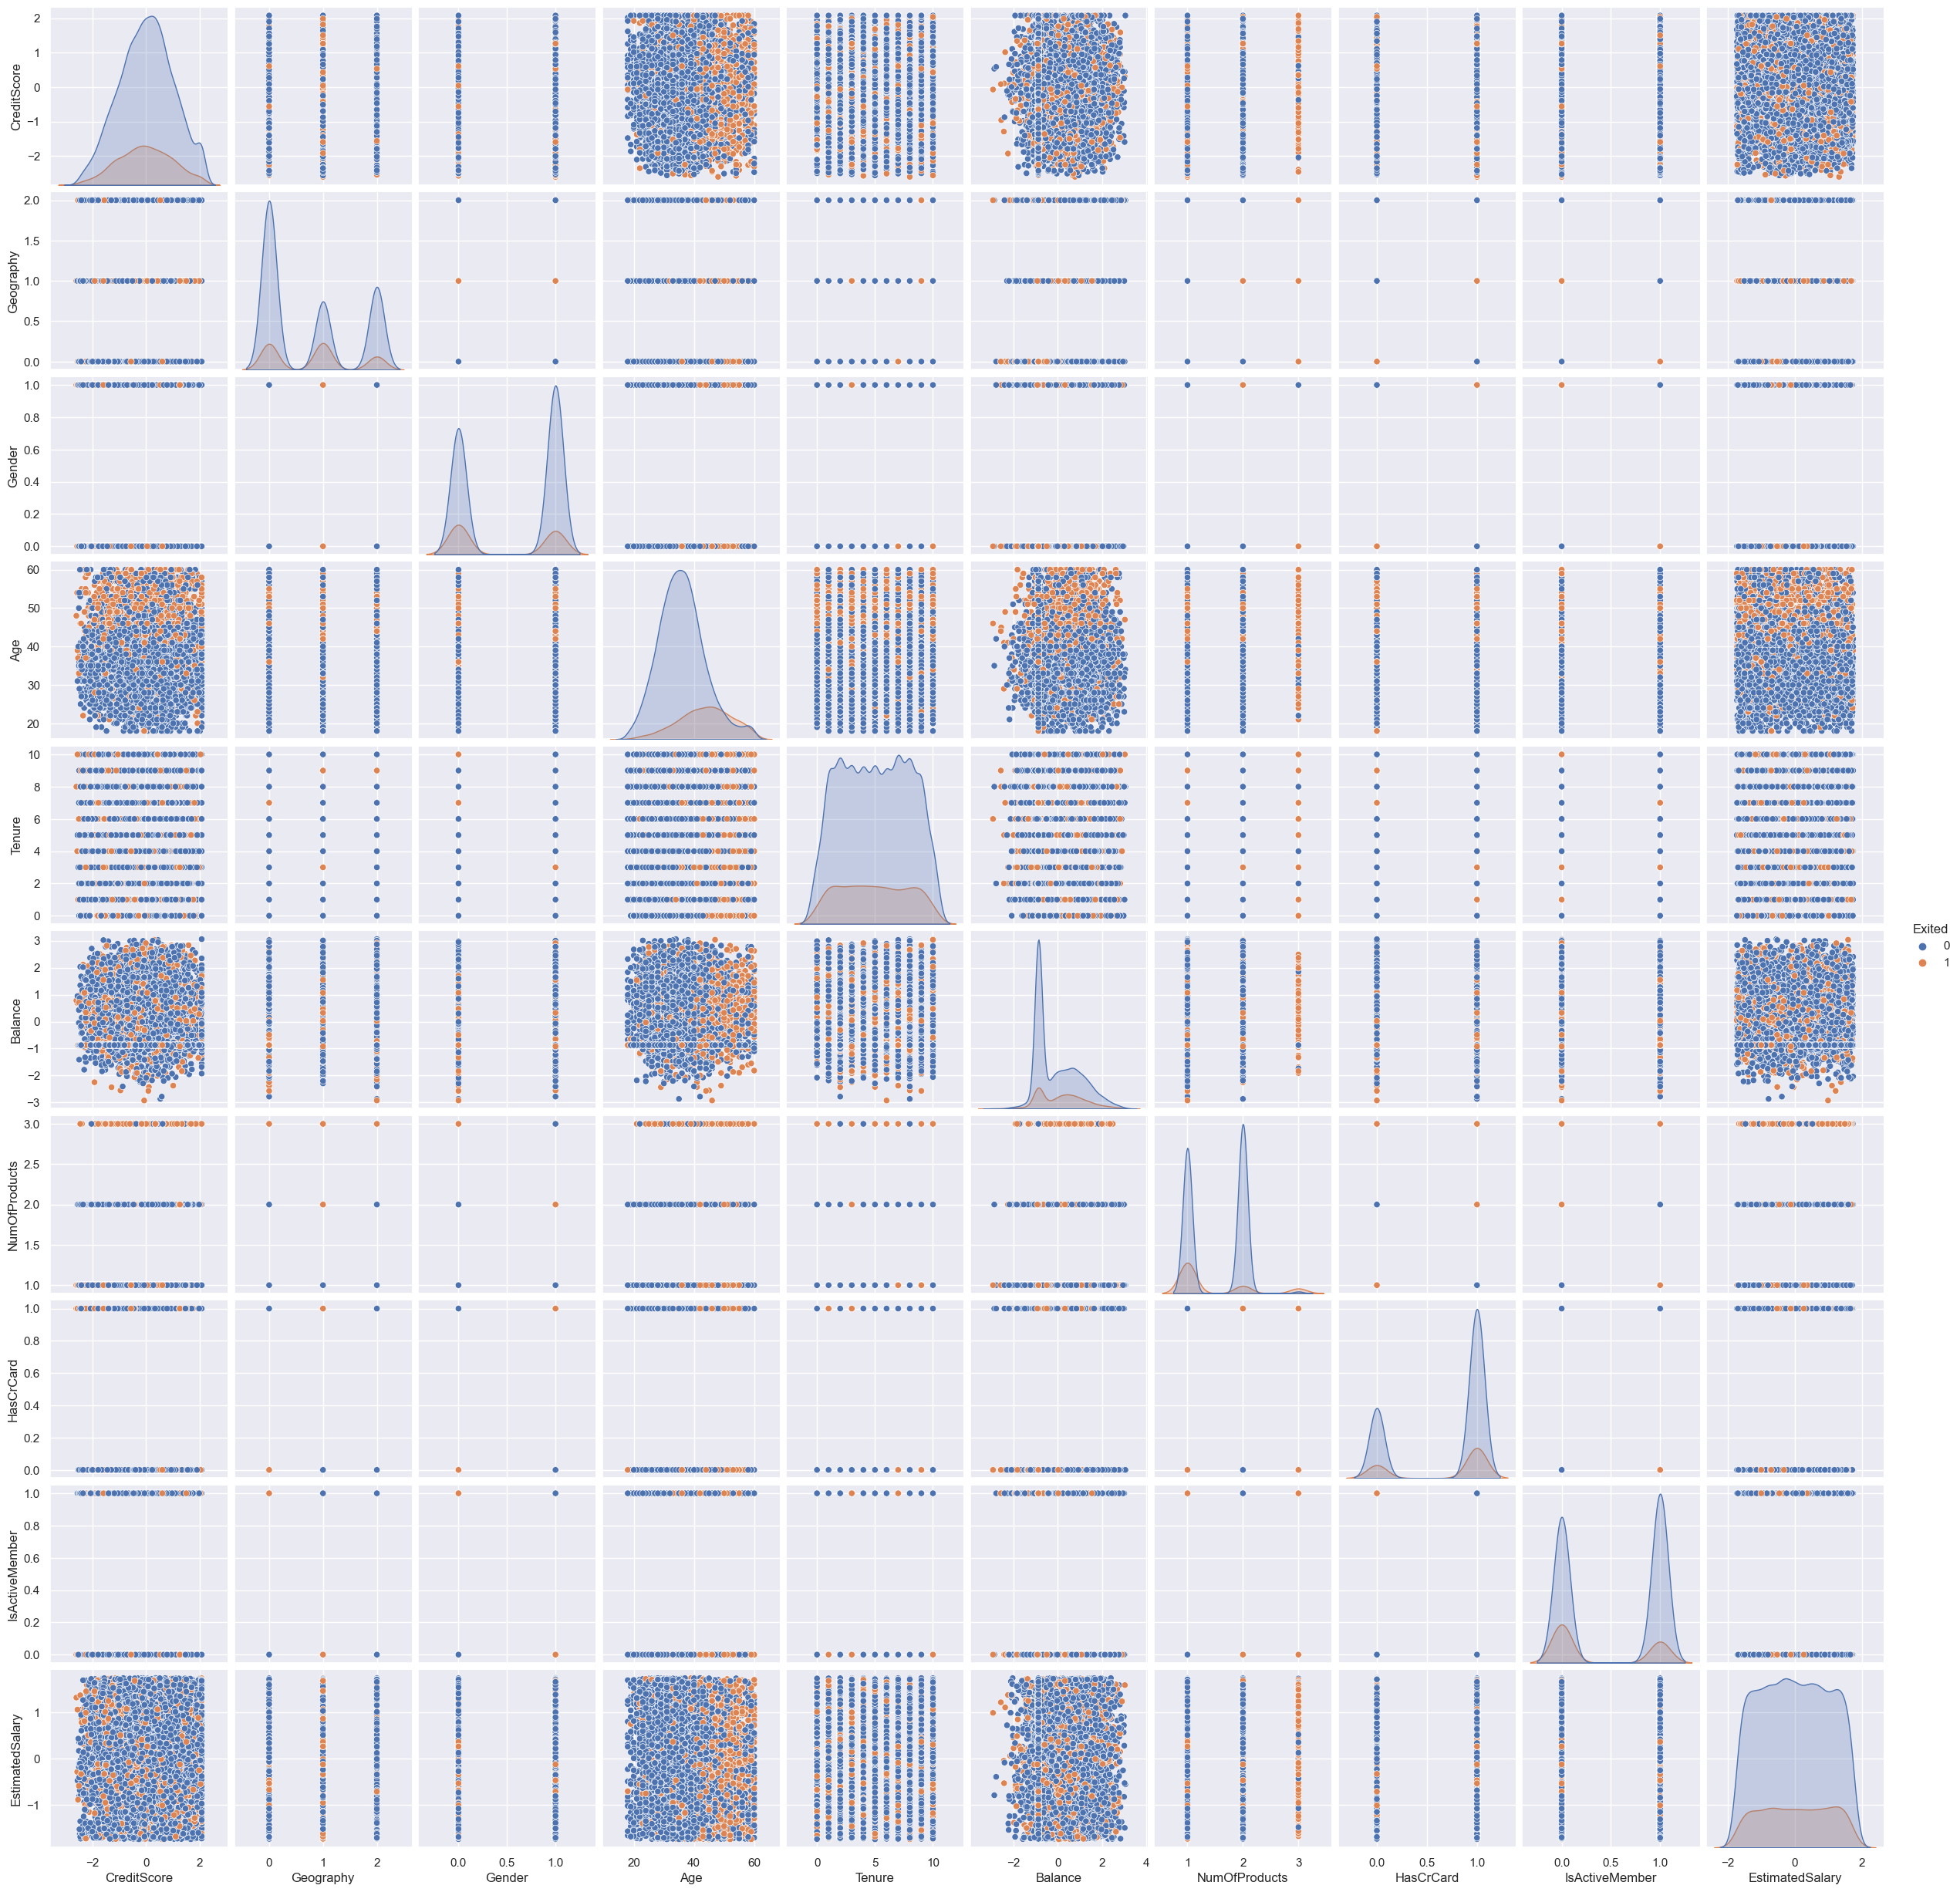

In [26]:
# Vẽ biểu đồ phân phối Pairplot
sns.pairplot(data = df, hue = 'Exited')

In [27]:
# Số lượng giá trị "0" của cột "Exited"
Exited0 = df[df["Exited"] == 0]
Exited0

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
1       -0.447306          2       0   41       1 -0.638892              1   
3        0.501871          0       0   39       1 -0.873477              2   
4        2.076878          2       0   43       2  0.697207              1   
6        1.784824          0       1   50       7 -0.873477              2   
8       -1.563370          0       1   44       4  1.227131              2   
...           ...        ...     ...  ...     ...       ...            ...   
9993    -0.071807          0       1   28       7  1.643931              1   
9994     1.555352          0       0   29       2 -0.873477              2   
9995     1.252868          0       1   39       5 -0.873477              2   
9996    -1.406913          0       1   35      10 -1.485933              1   
9999     1.471908          0       0   28       4  0.845608              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1         0.216669       0  
3             0               0        -0.108651       0  
4             1               1        -0.364905       0  
6             1               1        -1.564631       0  
8             0               1        -0.436929       0  
...         ...             ...              ...     ...  
9993          1               0        -1.232345       0  
9994          0               0         1.176691       0  
9995          1               0        -0.066169       0  
9996          1               1         0.028199       0  
9999          1               0        -1.075711       0  

[7599 rows x 11 columns]

In [28]:
# Số lượng giá trị "1" của cột "Exited"
Exited = df[df["Exited"] == 1]
Exited

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0       -0.332570          0       0   42       2 -0.873477              1   
2       -1.552940          0       0   42       8  1.791320              3   
5       -0.061377          2       1   44       8  0.320594              2   
16       0.022067          1       1   58       1  0.924426              1   
22      -1.469496          2       0   38       4 -0.873477              1   
...           ...        ...     ...  ...     ...       ...            ...   
9981    -1.594662          1       1   42       3  1.547152              1   
9982     0.042928          1       0   46       7  1.069952              1   
9991    -0.562041          0       0   53       4 -0.492369              1   
9997     0.606176          0       0   36       7 -0.873477              1   
9998     1.263298          1       1   42       3 -0.918670              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1         0.022100       1  
2             1               0         0.240812       1  
5             1               0         0.863523       1  
16            1               0        -1.650934       1  
22            1               0         0.327408       1  
...         ...             ...              ...     ...  
9981          1               1        -0.810560       1  
9982          1               0         0.261928       1  
9991          1               0        -0.533500       1  
9997          0               1        -1.008012       1  
9998          1               0        -0.124957       1  

[1825 rows x 11 columns]

In [29]:
Exited0 = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

# Lấy mẫu lại tập dữ liệu gốc với 1000 điểm dữ liệu cho cả hai lớp
Exited0_resample = Exited0.sample(n = 1000, random_state = 123)
Exited_resample = Exited.sample(n = 1000, random_state = 123)

# Tạo tập dữ liệu mới bao gồm sự xuất hiện của lớp bằng nhau
df = pd.concat([Exited0_resample, Exited_resample], axis = 0)
df

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
837      0.366274          1       0   56       5  0.252874              1   
3466     1.461478          0       1   28       4 -0.873477              1   
3037     0.439288          0       1   21       1 -0.873477              2   
4011     0.449718          1       1   33       4  0.650960              1   
6392    -0.416014          2       0   28       3 -0.236046              2   
...           ...        ...     ...  ...     ...       ...            ...   
3969    -1.041845          2       1   27       2  0.324356              1   
6972    -0.582902          0       1   52       9 -0.873477              1   
2973    -0.624624          0       0   56       9  0.805230              1   
3046     0.074220          1       0   31       3  0.937246              1   
4292     0.574884          2       0   46       2  0.766078              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
837           1               1        -0.339358       0  
3466          1               0         1.292489       0  
3037          1               1        -1.678809       0  
4011          1               1        -0.385368       0  
6392          1               0         1.413881       0  
...         ...             ...              ...     ...  
3969          1               1        -0.259820       1  
6972          1               1         0.108867       1  
2973          1               1         1.671528       1  
3046          0               1         0.804121       1  
4292          1               0         0.870478       1  

[2000 rows x 11 columns]

Exited
0    1000
1    1000
Name: count, dtype: int64

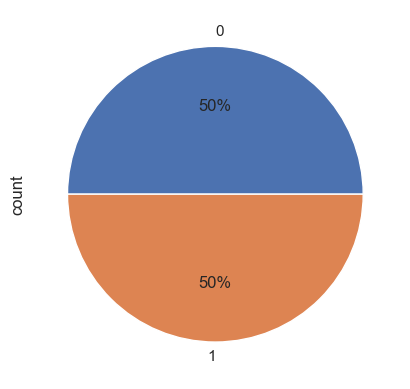

In [30]:
df.value_counts("Exited").plot.pie(autopct = "%1.f%%") #Biểu đồ tròn
df.value_counts("Exited")

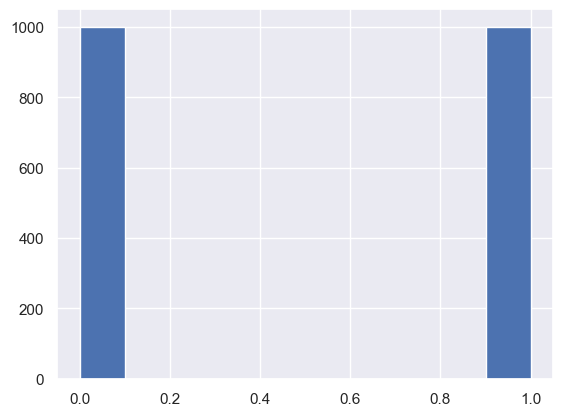

In [31]:
import matplotlib.pyplot as plt
plt.hist(df['Exited'])
plt.show()

## **Dimension reduction**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


# Separate features and target variable
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']

# Impute missing values (example using mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize PCA with desired number of components
pca = PCA(n_components=2)

# Fit PCA on the imputed data
pca.fit(X_imputed)

# Transform the data into the reduced dimension space
X_pca = pca.transform(X_imputed)

# Print the reduced features (optional)
print(X_pca)  # Prints the transformed data points

[[-16.24754182  -0.10906012]
 [ 11.74297894   1.24132451]
 [ 18.70502953   4.35456235]
 ...
 [-16.19845721  -4.12487297]
 [  8.71814679   2.23329646]
 [ -6.28421636   3.0237299 ]]


In [33]:
y

837     0
3466    0
3037    0
4011    0
6392    0
       ..
3969    1
6972    1
2973    1
3046    1
4292    1
Name: Exited, Length: 2000, dtype: int64

In [34]:
df

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
837      0.366274          1       0   56       5  0.252874              1   
3466     1.461478          0       1   28       4 -0.873477              1   
3037     0.439288          0       1   21       1 -0.873477              2   
4011     0.449718          1       1   33       4  0.650960              1   
6392    -0.416014          2       0   28       3 -0.236046              2   
...           ...        ...     ...  ...     ...       ...            ...   
3969    -1.041845          2       1   27       2  0.324356              1   
6972    -0.582902          0       1   52       9 -0.873477              1   
2973    -0.624624          0       0   56       9  0.805230              1   
3046     0.074220          1       0   31       3  0.937246              1   
4292     0.574884          2       0   46       2  0.766078              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
837           1               1        -0.339358       0  
3466          1               0         1.292489       0  
3037          1               1        -1.678809       0  
4011          1               1        -0.385368       0  
6392          1               0         1.413881       0  
...         ...             ...              ...     ...  
3969          1               1        -0.259820       1  
6972          1               1         0.108867       1  
2973          1               1         1.671528       1  
3046          0               1         0.804121       1  
4292          1               0         0.870478       1  

[2000 rows x 11 columns]

**Correlation Heatmap**

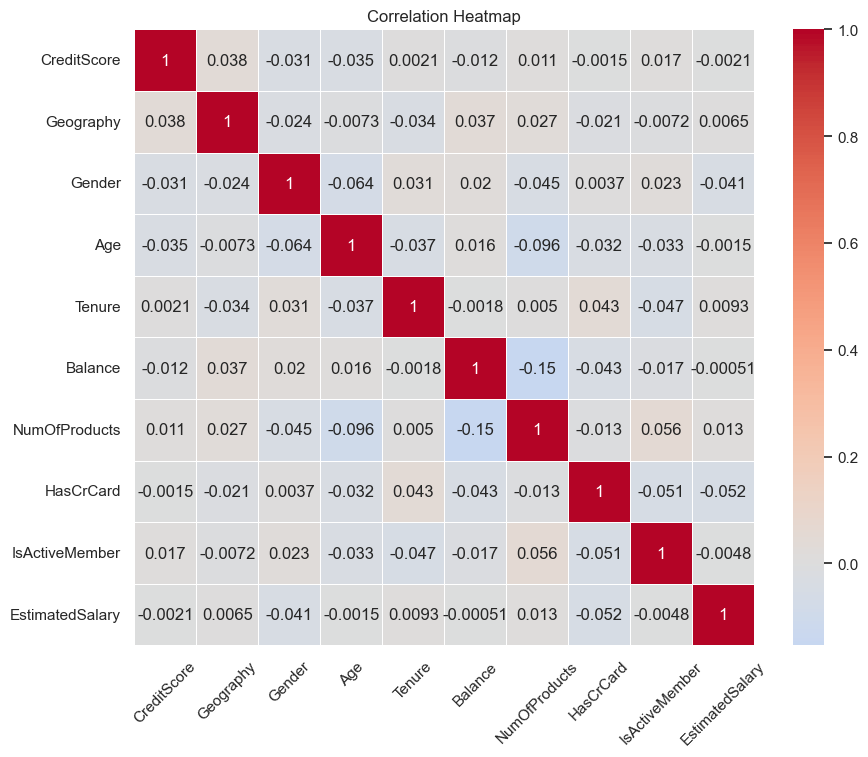

In [35]:
import seaborn as sns

# Calculate correlation
correlation = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, linewidths=0.5)  # Add linewidths for gridlines
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many features
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

**Adjust Correlation Heatmap**

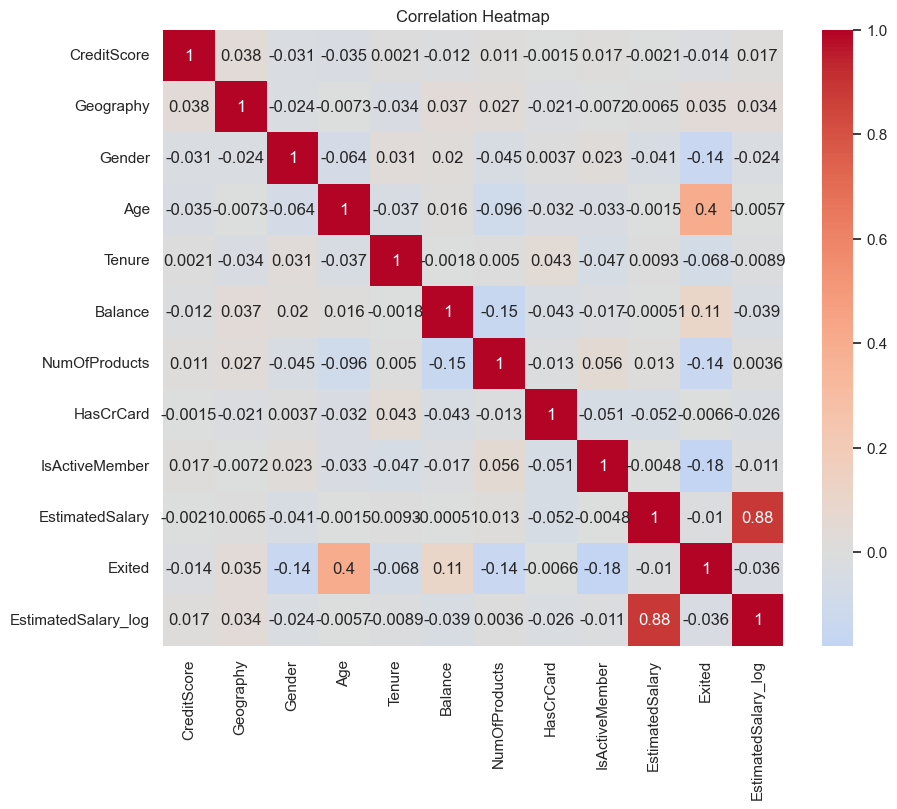

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Select Target and Feature Variables
target_var = 'Exited'  # Change to your target variable name
feature_vars = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
# Check for Missing Values
if df[feature_vars].isnull().sum().any():
    print("Missing values detected in feature variables. Consider imputation or handling missing data appropriately.")
    # Handle missing data (e.g., imputation, listwise deletion)

# Standardize Numerical Variables
numerical_vars = [var for var in feature_vars if df[var].dtype != 'object']
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Calculate Correlation Matrix
correlation = df[feature_vars + [target_var]].corr()

# Identify Weak Correlations
weak_correlations = correlation.loc[target_var, :].abs()[correlation.loc[target_var, :].abs() < 0.3]

# Address Weak Correlations (Iterate through each weak correlation)
for weak_col in weak_correlations.index:
    if weak_col != target_var:
        if df[weak_col].dtype == 'float64':
            df[weak_col + '_log'] = np.log(df[weak_col] + 1)  # Add a transformed column
            correlation = df[feature_vars + [target_var] + [weak_col + '_log']].corr()  # Update correlation matrix
            weak_correlations = correlation.loc[target_var, :].abs()[correlation.loc[target_var, :].abs() < 0.3]  # Re-evaluate weak correlations

# Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Explore Weak Correlations Further
# ... (Perform additional analysis, modeling, or interpretation)

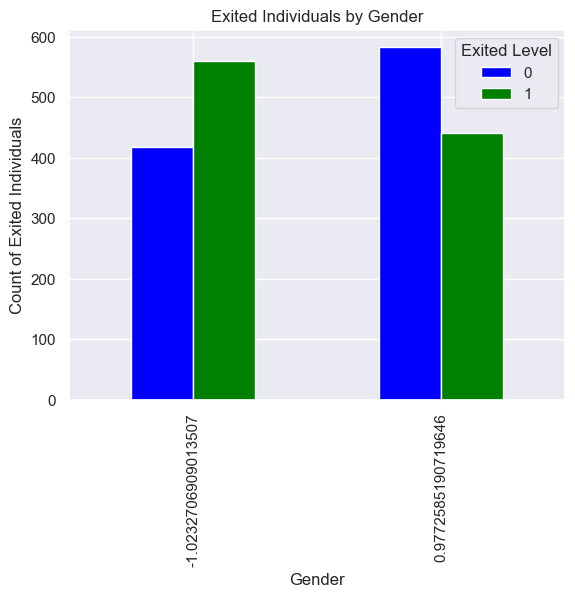

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
gender_excited_counts = df.groupby('Gender')['Exited'].value_counts().unstack()

# Create a bar chart
gender_excited_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count of Exited Individuals')
plt.title('Exited Individuals by Gender')
plt.legend(title='Exited Level')
plt.show()

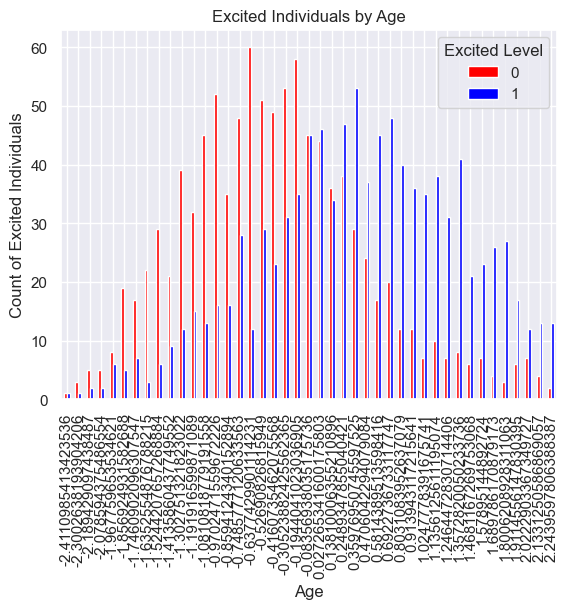

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
gender_excited_counts = df.groupby('Age')['Exited'].value_counts().unstack()

# Create a bar chart
gender_excited_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Age')
plt.ylabel('Count of Excited Individuals')
plt.title('Excited Individuals by Age')
plt.legend(title='Excited Level')
plt.show()

## **PyCaret Binary Classification**

In [39]:
!pip install pycaret pandas shap

In [40]:
import pandas as pd
import numpy as np
import warnings

# Ignoring warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

df

CreditScore  Geography    Gender       Age    Tenure   Balance  \
837      0.357425   0.258076 -1.023271  1.800621 -0.035073  0.164466   
3466     1.429716  -1.000832  0.977259 -1.302751 -0.375588 -0.963134   
3037     0.428911  -1.000832  0.977259 -2.078594 -1.397132 -0.963134   
4011     0.439123   0.258076  0.977259 -0.748578 -0.375588  0.562993   
6392    -0.408497   1.516984 -1.023271 -1.302751 -0.716102 -0.324996   
...           ...        ...       ...       ...       ...       ...   
3969    -1.021234   1.516984  0.977259 -1.413586 -1.056617  0.236027   
6972    -0.571893  -1.000832  0.977259  1.357282  1.326986 -0.963134   
2973    -0.612743  -1.000832 -1.023271  1.800621  1.326986  0.717435   
3046     0.071481   0.258076 -1.023271 -0.970247 -0.716102  0.849597   
4292     0.561671   1.516984 -1.023271  0.692274 -1.056617  0.678239   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
837       -0.803548   0.640654        1.101086        -0.397483       0   
3466      -0.803548   0.640654       -0.908195         1.247964       0   
3037       0.849843   0.640654        1.101086        -1.748099       0   
4011      -0.803548   0.640654        1.101086        -0.443877       0   
6392       0.849843   0.640654       -0.908195         1.370369       0   
...             ...        ...             ...              ...     ...   
3969      -0.803548   0.640654        1.101086        -0.317282       1   
6972      -0.803548   0.640654        1.101086         0.054478       1   
2973      -0.803548   0.640654        1.101086         1.630163       1   
3046      -0.803548  -1.560906        1.101086         0.755527       1   
4292       0.849843   0.640654       -0.908195         0.822436       1   

      CreditScore_log  Geography_log  Gender_log  Tenure_log  Balance_log  \
837          0.305590       0.229584         NaN   -0.035703     0.152262   
3466         0.887774            NaN    0.681711   -0.470944    -3.300454   
3037         0.356913            NaN    0.681711         NaN    -3.300454   
4011         0.364034       0.229584    0.681711   -0.470944     0.446603   
6392        -0.525088       0.923061         NaN   -1.259141    -0.393037   
...               ...            ...         ...         ...          ...   
3969              NaN       0.923061    0.681711         NaN     0.211903   
6972        -0.848383            NaN    0.681711    0.844574    -3.300454   
2973        -0.948666            NaN         NaN    0.844574     0.540832   
3046         0.069042       0.229584         NaN   -1.259141     0.614968   
4292         0.445756       0.923061         NaN         NaN     0.517745   

      NumOfProducts_log  HasCrCard_log  IsActiveMember_log  \
837           -1.627339       0.495095            0.742454   
3466          -1.627339       0.495095           -2.388085   
3037           0.615101       0.495095            0.742454   
4011          -1.627339       0.495095            0.742454   
6392           0.615101       0.495095           -2.388085   
...                 ...            ...                 ...   
3969          -1.627339       0.495095            0.742454   
6972          -1.627339       0.495095            0.742454   
2973          -1.627339       0.495095            0.742454   
3046          -1.627339            NaN            0.742454   
4292           0.615101       0.495095           -2.388085   

      EstimatedSalary_log  
837             -0.506640  
3466             0.810025  
3037                  NaN  
4011            -0.586765  
6392             0.863045  
...                   ...  
3969            -0.381674  
6972             0.053046  
2973             0.967046  
3046             0.562769  
4292             0.600174  

[2000 rows x 20 columns]

In [41]:
# Set up
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

clf1 = setup(df, target = 'Exited', session_id = 123)
print(clf1)

In [42]:
# Compare baseline models
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
# Evaluate model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

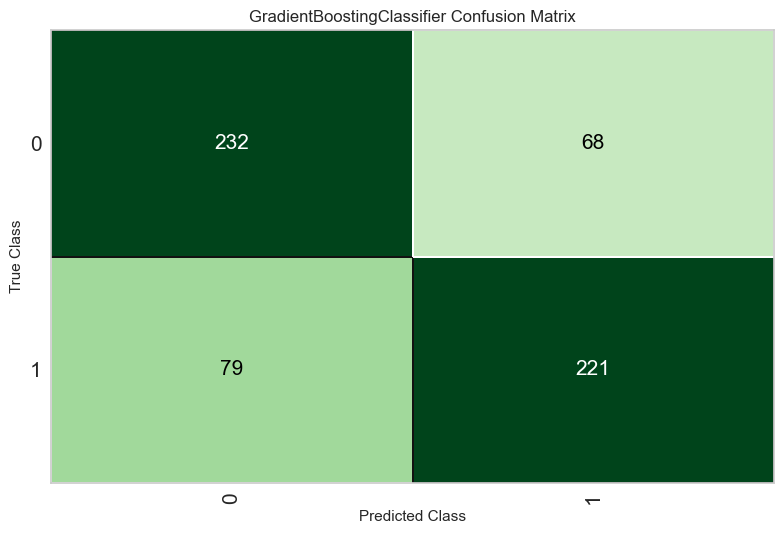

In [44]:
# Analyze model
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

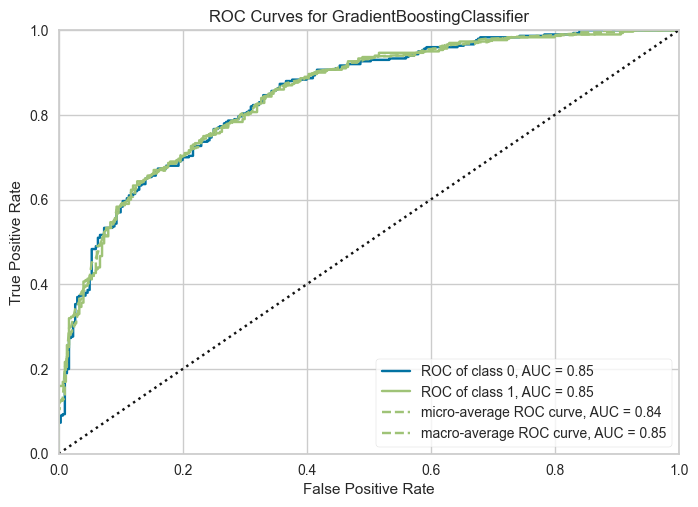

In [45]:
# plot AUC
plot_model(best_model, plot = 'auc')

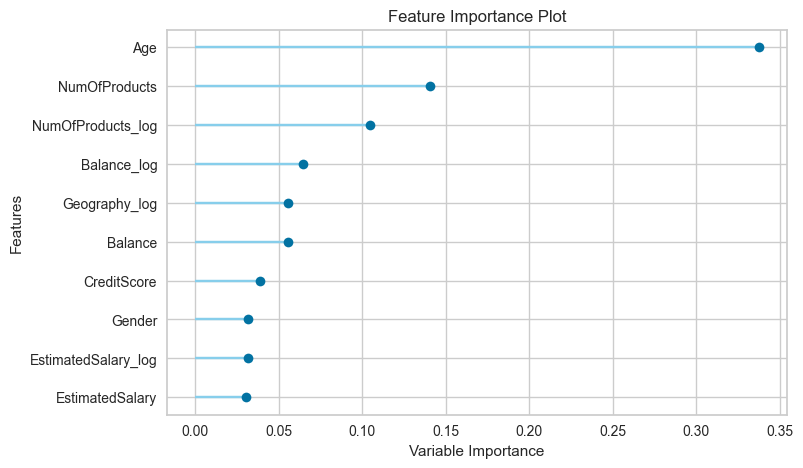

In [46]:
# plot feature importance
plot_model(best_model, plot = 'feature')

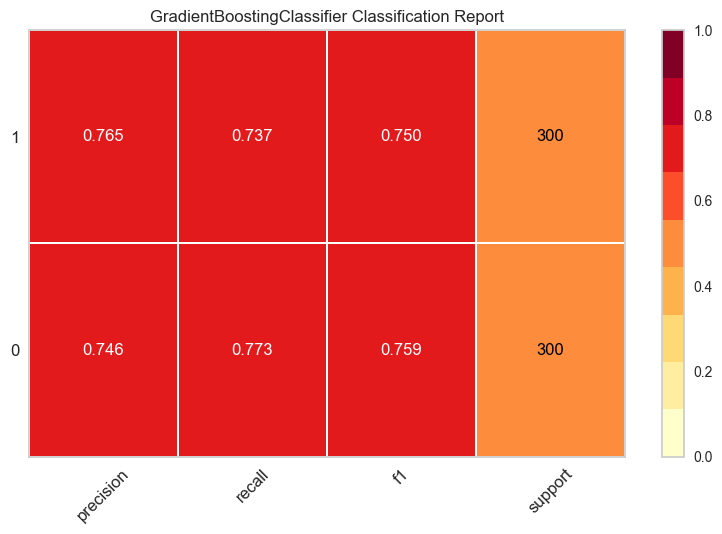

In [47]:
# plot class report
plot_model(best_model, plot = 'class_report')

In [48]:
# predict on test set
predict_model(best_model)

CreditScore  Geography    Gender       Age    Tenure   Balance  \
6519     0.183816   0.258076 -1.023271  1.135613 -0.375588  0.196822   
471      0.531034  -1.000832  0.977259 -0.305239 -1.397132  1.387126   
2793    -0.245100   0.258076  0.977259 -1.856925 -0.035073  2.493127   
8371     1.654386   0.258076 -1.023271 -1.191917 -0.035073 -0.014593   
2213    -1.562486   0.258076 -1.023271  0.138100 -0.375588 -0.608550   
...           ...        ...       ...       ...       ...       ...   
2072     0.939526  -1.000832  0.977259 -0.416074 -0.375588 -0.963134   
7970     2.032241  -1.000832  0.977259 -1.081082  0.305442 -0.643564   
1621     0.388062   1.516984  0.977259 -0.194404 -0.035073 -1.008382   
4361     1.327593   0.258076 -1.023271  0.913943  1.326985 -0.760801   
6708     1.051861  -1.000832  0.977259 -0.637743  0.645956 -0.963134   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
6519      -0.803548  -1.560906       -0.908195         1.106886  ...   
471       -0.803548   0.640654       -0.908195        -1.447770  ...   
2793      -0.803548   0.640654       -0.908195        -0.002334  ...   
8371      -0.803548  -1.560906       -0.908195         1.485302  ...   
2213       0.849843   0.640654        1.101086        -1.588899  ...   
...             ...        ...             ...              ...  ...   
2072       0.849843   0.640654        1.101086         1.536729  ...   
7970      -0.803548   0.640654        1.101086         1.499891  ...   
1621      -0.803548   0.640654        1.101086        -1.657697  ...   
4361      -0.803548   0.640654       -0.908195         0.376621  ...   
6708       0.849843   0.640654        1.101086        -0.666240  ...   

      Gender_log  Tenure_log  Balance_log  NumOfProducts_log  HasCrCard_log  \
6519         NaN   -0.470944     0.179670          -1.627339            NaN   
471     0.681711         NaN     0.870090          -1.627339       0.495095   
2793    0.681711   -0.035703     1.250797          -1.627339       0.495095   
8371         NaN   -0.035703    -0.014701          -1.627339            NaN   
2213         NaN   -0.470944    -0.937898           0.615101       0.495095   
...          ...         ...          ...                ...            ...   
2072    0.681711   -0.470944    -3.300454           0.615101       0.495095   
7970    0.681711    0.266541    -1.031602          -1.627339       0.495095   
1621    0.681711   -0.035703          NaN          -1.627339       0.495095   
4361         NaN    0.844574    -1.430462          -1.627339       0.495095   
6708    0.681711    0.498322    -3.300454           0.615101       0.495095   

      IsActiveMember_log  EstimatedSalary_log  Exited  prediction_label  \
6519           -2.388085             0.745211       1                 1   
471            -2.388085                  NaN       1                 0   
2793           -2.388085            -0.002337       0                 0   
8371           -2.388085             0.910394       1                 1   
2213            0.742454                  NaN       1                 0   
...                  ...                  ...     ...               ...   
2072            0.742454             0.930875       0                 0   
7970            0.742454             0.916247       0                 0   
1621            0.742454                  NaN       1                 0   
4361           -2.388085             0.319632       1                 1   
6708            0.742454            -1.097333       0                 0   

      prediction_score  
6519            0.9309  
471             0.5092  
2793            0.8557  
8371            0.7931  
2213            0.5509  
...                ...  
2072            0.9415  
7970            0.8820  
1621            0.6716  
4361            0.8156  
6708            0.9365  

[600 rows x 22 columns]

In [49]:
# save pipeline
save_model(best_model, 'phantichdulieu')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Geography',
                                              'Gender', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary',
                                              'CreditScore_log', 'Geography_log',
                                              'Gender_log', 'Tenure_log',
                                              'Balance_log', 'NumOfProducts_log',
                                              'HasCrCard_log',
                                              'IsActiveM...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, 

In [50]:
# load pipeline
loaded_best_pipeline = load_model('phantichdulieu')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\TuPhone\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Geography',
                                             'Gender', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'HasCrCard', 'IsActiveMember',
                                             'EstimatedSalary',
                                             'CreditScore_log', 'Geography_log',
                                             'Gender_log', 'Tenure_log',
                                             'Balance_log', 'Num...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [51]:
# compare model
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [52]:
blend_models(best_recall_models_top3)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         ma...
                                                         warm_start=False)),
                             ('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0,
                                                 warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

In [53]:
# check available models
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

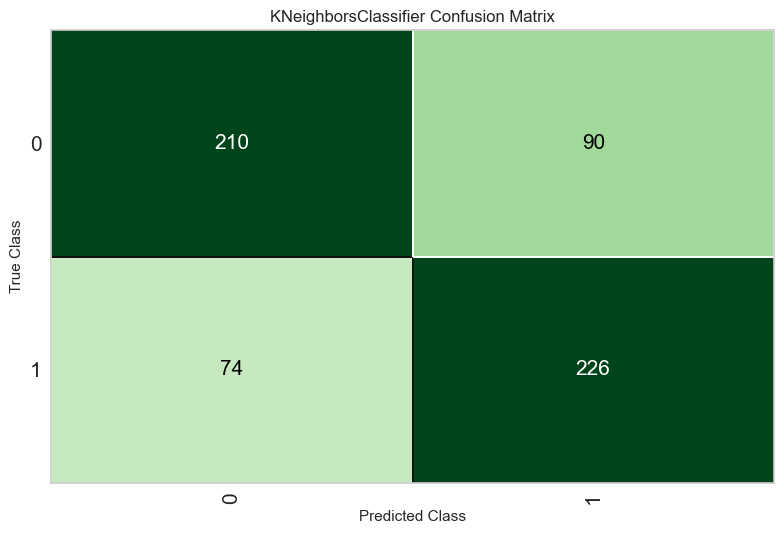

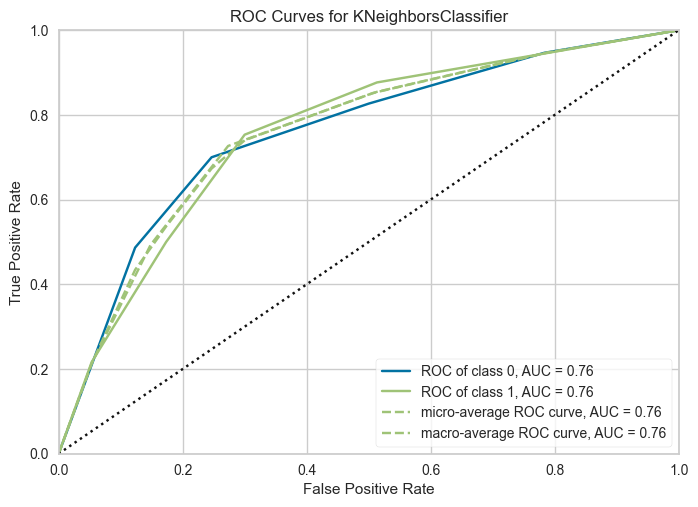

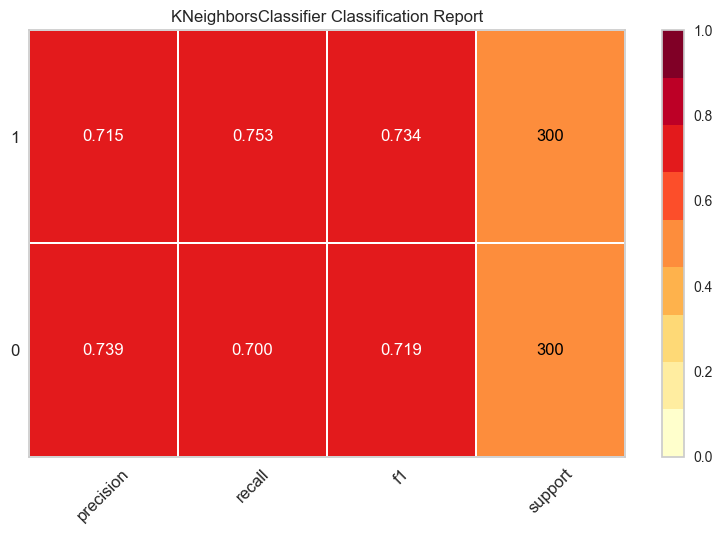

CreditScore  Geography    Gender       Age    Tenure   Balance  \
6519     0.183816   0.258076 -1.023271  1.135613 -0.375588  0.196822   
471      0.531034  -1.000832  0.977259 -0.305239 -1.397132  1.387126   
2793    -0.245100   0.258076  0.977259 -1.856925 -0.035073  2.493127   
8371     1.654386   0.258076 -1.023271 -1.191917 -0.035073 -0.014593   
2213    -1.562486   0.258076 -1.023271  0.138100 -0.375588 -0.608550   
...           ...        ...       ...       ...       ...       ...   
2072     0.939526  -1.000832  0.977259 -0.416074 -0.375588 -0.963134   
7970     2.032241  -1.000832  0.977259 -1.081082  0.305442 -0.643564   
1621     0.388062   1.516984  0.977259 -0.194404 -0.035073 -1.008382   
4361     1.327593   0.258076 -1.023271  0.913943  1.326985 -0.760801   
6708     1.051861  -1.000832  0.977259 -0.637743  0.645956 -0.963134   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
6519      -0.803548  -1.560906       -0.908195         1.106886  ...   
471       -0.803548   0.640654       -0.908195        -1.447770  ...   
2793      -0.803548   0.640654       -0.908195        -0.002334  ...   
8371      -0.803548  -1.560906       -0.908195         1.485302  ...   
2213       0.849843   0.640654        1.101086        -1.588899  ...   
...             ...        ...             ...              ...  ...   
2072       0.849843   0.640654        1.101086         1.536729  ...   
7970      -0.803548   0.640654        1.101086         1.499891  ...   
1621      -0.803548   0.640654        1.101086        -1.657697  ...   
4361      -0.803548   0.640654       -0.908195         0.376621  ...   
6708       0.849843   0.640654        1.101086        -0.666240  ...   

      Gender_log  Tenure_log  Balance_log  NumOfProducts_log  HasCrCard_log  \
6519         NaN   -0.470944     0.179670          -1.627339            NaN   
471     0.681711         NaN     0.870090          -1.627339       0.495095   
2793    0.681711   -0.035703     1.250797          -1.627339       0.495095   
8371         NaN   -0.035703    -0.014701          -1.627339            NaN   
2213         NaN   -0.470944    -0.937898           0.615101       0.495095   
...          ...         ...          ...                ...            ...   
2072    0.681711   -0.470944    -3.300454           0.615101       0.495095   
7970    0.681711    0.266541    -1.031602          -1.627339       0.495095   
1621    0.681711   -0.035703          NaN          -1.627339       0.495095   
4361         NaN    0.844574    -1.430462          -1.627339       0.495095   
6708    0.681711    0.498322    -3.300454           0.615101       0.495095   

      IsActiveMember_log  EstimatedSalary_log  Exited  prediction_label  \
6519           -2.388085             0.745211       1                 1   
471            -2.388085                  NaN       1                 1   
2793           -2.388085            -0.002337       0                 0   
8371           -2.388085             0.910394       1                 1   
2213            0.742454                  NaN       1                 1   
...                  ...                  ...     ...               ...   
2072            0.742454             0.930875       0                 0   
7970            0.742454             0.916247       0                 0   
1621            0.742454                  NaN       1                 0   
4361           -2.388085             0.319632       1                 1   
6708            0.742454            -1.097333       0                 0   

      prediction_score  
6519               0.8  
471                1.0  
2793               0.8  
8371               0.8  
2213               0.6  
...                ...  
2072               1.0  
7970               0.8  
1621               0.8  
4361               0.6  
6708               0.8  

[600 rows x 22 columns]

In [54]:
# create model
# train knn model
knn = create_model('knn')
plot_model(knn, plot = 'confusion_matrix')
plot_model(knn, plot = 'auc')
plot_model(knn, plot = 'class_report')
predict_model(knn)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

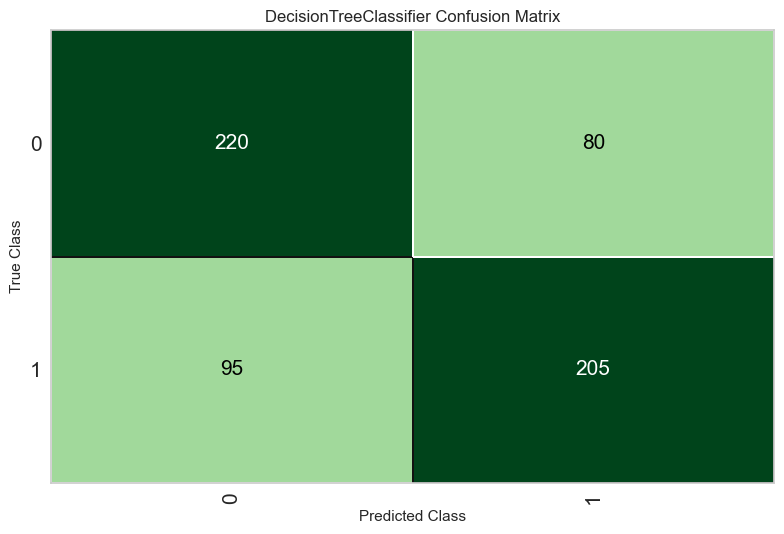

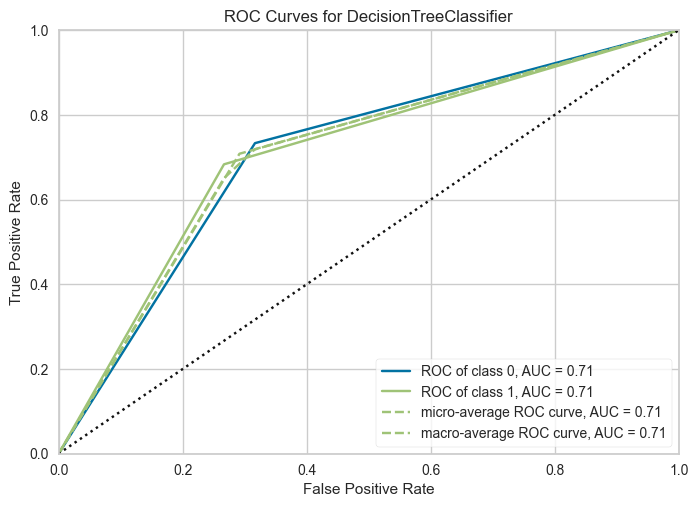

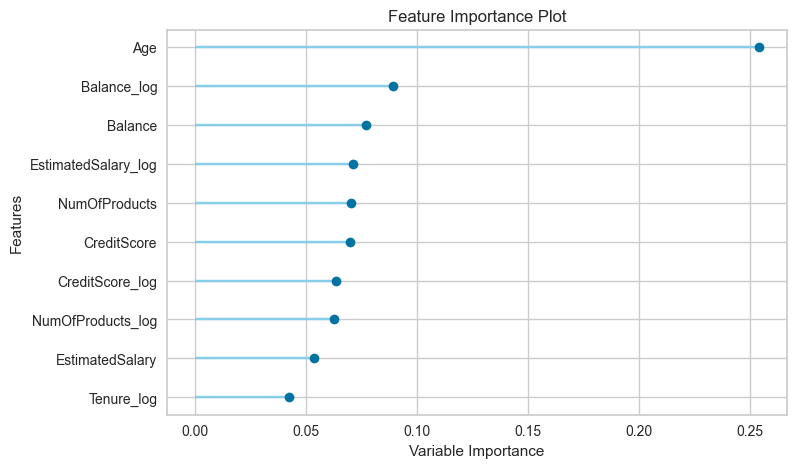

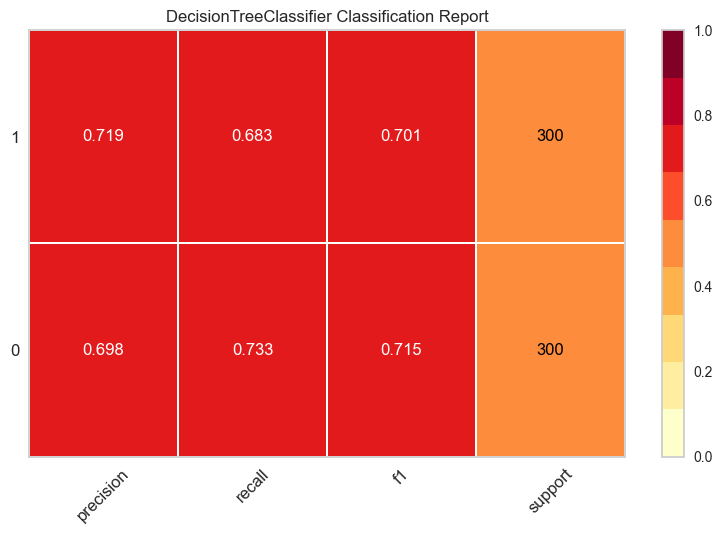

CreditScore  Geography    Gender       Age    Tenure   Balance  \
6519     0.183816   0.258076 -1.023271  1.135613 -0.375588  0.196822   
471      0.531034  -1.000832  0.977259 -0.305239 -1.397132  1.387126   
2793    -0.245100   0.258076  0.977259 -1.856925 -0.035073  2.493127   
8371     1.654386   0.258076 -1.023271 -1.191917 -0.035073 -0.014593   
2213    -1.562486   0.258076 -1.023271  0.138100 -0.375588 -0.608550   
...           ...        ...       ...       ...       ...       ...   
2072     0.939526  -1.000832  0.977259 -0.416074 -0.375588 -0.963134   
7970     2.032241  -1.000832  0.977259 -1.081082  0.305442 -0.643564   
1621     0.388062   1.516984  0.977259 -0.194404 -0.035073 -1.008382   
4361     1.327593   0.258076 -1.023271  0.913943  1.326985 -0.760801   
6708     1.051861  -1.000832  0.977259 -0.637743  0.645956 -0.963134   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
6519      -0.803548  -1.560906       -0.908195         1.106886  ...   
471       -0.803548   0.640654       -0.908195        -1.447770  ...   
2793      -0.803548   0.640654       -0.908195        -0.002334  ...   
8371      -0.803548  -1.560906       -0.908195         1.485302  ...   
2213       0.849843   0.640654        1.101086        -1.588899  ...   
...             ...        ...             ...              ...  ...   
2072       0.849843   0.640654        1.101086         1.536729  ...   
7970      -0.803548   0.640654        1.101086         1.499891  ...   
1621      -0.803548   0.640654        1.101086        -1.657697  ...   
4361      -0.803548   0.640654       -0.908195         0.376621  ...   
6708       0.849843   0.640654        1.101086        -0.666240  ...   

      Gender_log  Tenure_log  Balance_log  NumOfProducts_log  HasCrCard_log  \
6519         NaN   -0.470944     0.179670          -1.627339            NaN   
471     0.681711         NaN     0.870090          -1.627339       0.495095   
2793    0.681711   -0.035703     1.250797          -1.627339       0.495095   
8371         NaN   -0.035703    -0.014701          -1.627339            NaN   
2213         NaN   -0.470944    -0.937898           0.615101       0.495095   
...          ...         ...          ...                ...            ...   
2072    0.681711   -0.470944    -3.300454           0.615101       0.495095   
7970    0.681711    0.266541    -1.031602          -1.627339       0.495095   
1621    0.681711   -0.035703          NaN          -1.627339       0.495095   
4361         NaN    0.844574    -1.430462          -1.627339       0.495095   
6708    0.681711    0.498322    -3.300454           0.615101       0.495095   

      IsActiveMember_log  EstimatedSalary_log  Exited  prediction_label  \
6519           -2.388085             0.745211       1                 1   
471            -2.388085                  NaN       1                 0   
2793           -2.388085            -0.002337       0                 0   
8371           -2.388085             0.910394       1                 1   
2213            0.742454                  NaN       1                 0   
...                  ...                  ...     ...               ...   
2072            0.742454             0.930875       0                 0   
7970            0.742454             0.916247       0                 0   
1621            0.742454                  NaN       1                 0   
4361           -2.388085             0.319632       1                 1   
6708            0.742454            -1.097333       0                 0   

      prediction_score  
6519               1.0  
471                1.0  
2793               1.0  
8371               1.0  
2213               1.0  
...                ...  
2072               1.0  
7970               1.0  
1621               1.0  
4361               1.0  
6708               1.0  

[600 rows x 22 columns]

In [55]:
# train dt model
dt = create_model('dt')
plot_model(dt, plot = 'confusion_matrix')
plot_model(dt, plot = 'auc')
plot_model(dt, plot = 'feature')
plot_model(dt, plot = 'class_report')
predict_model(dt)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

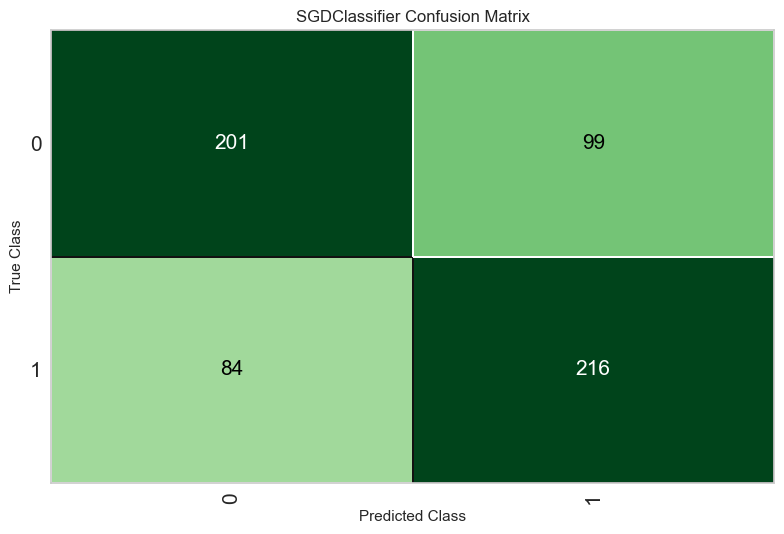

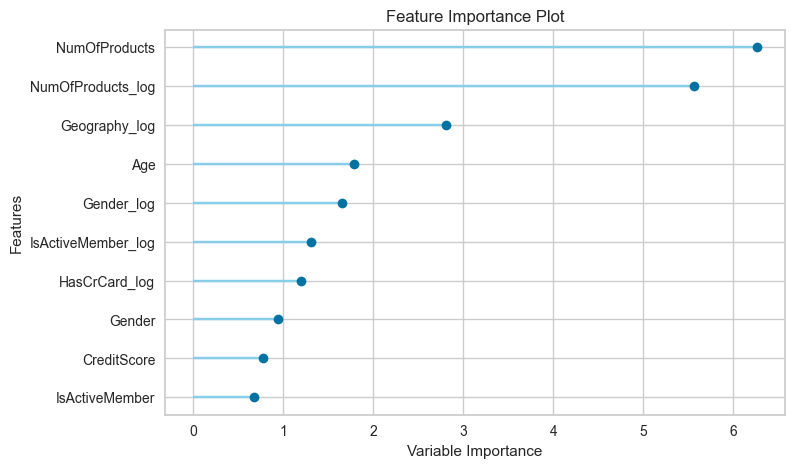

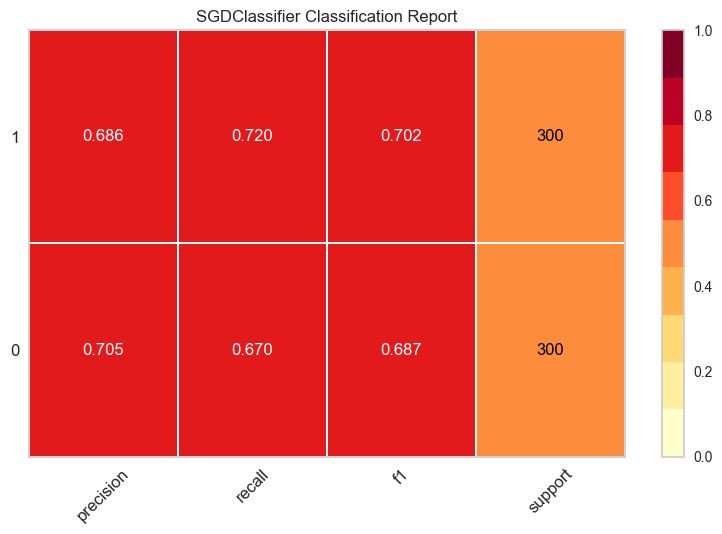

CreditScore  Geography    Gender       Age    Tenure   Balance  \
6519     0.183816   0.258076 -1.023271  1.135613 -0.375588  0.196822   
471      0.531034  -1.000832  0.977259 -0.305239 -1.397132  1.387126   
2793    -0.245100   0.258076  0.977259 -1.856925 -0.035073  2.493127   
8371     1.654386   0.258076 -1.023271 -1.191917 -0.035073 -0.014593   
2213    -1.562486   0.258076 -1.023271  0.138100 -0.375588 -0.608550   
...           ...        ...       ...       ...       ...       ...   
2072     0.939526  -1.000832  0.977259 -0.416074 -0.375588 -0.963134   
7970     2.032241  -1.000832  0.977259 -1.081082  0.305442 -0.643564   
1621     0.388062   1.516984  0.977259 -0.194404 -0.035073 -1.008382   
4361     1.327593   0.258076 -1.023271  0.913943  1.326985 -0.760801   
6708     1.051861  -1.000832  0.977259 -0.637743  0.645956 -0.963134   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
6519      -0.803548  -1.560906       -0.908195         1.106886  ...   
471       -0.803548   0.640654       -0.908195        -1.447770  ...   
2793      -0.803548   0.640654       -0.908195        -0.002334  ...   
8371      -0.803548  -1.560906       -0.908195         1.485302  ...   
2213       0.849843   0.640654        1.101086        -1.588899  ...   
...             ...        ...             ...              ...  ...   
2072       0.849843   0.640654        1.101086         1.536729  ...   
7970      -0.803548   0.640654        1.101086         1.499891  ...   
1621      -0.803548   0.640654        1.101086        -1.657697  ...   
4361      -0.803548   0.640654       -0.908195         0.376621  ...   
6708       0.849843   0.640654        1.101086        -0.666240  ...   

      Geography_log  Gender_log  Tenure_log  Balance_log  NumOfProducts_log  \
6519       0.229584         NaN   -0.470944     0.179670          -1.627339   
471             NaN    0.681711         NaN     0.870090          -1.627339   
2793       0.229584    0.681711   -0.035703     1.250797          -1.627339   
8371       0.229584         NaN   -0.035703    -0.014701          -1.627339   
2213       0.229584         NaN   -0.470944    -0.937898           0.615101   
...             ...         ...         ...          ...                ...   
2072            NaN    0.681711   -0.470944    -3.300454           0.615101   
7970            NaN    0.681711    0.266541    -1.031602          -1.627339   
1621       0.923061    0.681711   -0.035703          NaN          -1.627339   
4361       0.229584         NaN    0.844574    -1.430462          -1.627339   
6708            NaN    0.681711    0.498322    -3.300454           0.615101   

      HasCrCard_log  IsActiveMember_log  EstimatedSalary_log  Exited  \
6519            NaN           -2.388085             0.745211       1   
471        0.495095           -2.388085                  NaN       1   
2793       0.495095           -2.388085            -0.002337       0   
8371            NaN           -2.388085             0.910394       1   
2213       0.495095            0.742454                  NaN       1   
...             ...                 ...                  ...     ...   
2072       0.495095            0.742454             0.930875       0   
7970       0.495095            0.742454             0.916247       0   
1621       0.495095            0.742454                  NaN       1   
4361       0.495095           -2.388085             0.319632       1   
6708       0.495095            0.742454            -1.097333       0   

      prediction_label  
6519                 1  
471                  0  
2793                 0  
8371                 1  
2213                 0  
...                ...  
2072                 0  
7970                 0  
1621                 0  
4361                 1  
6708                 0  

[600 rows x 21 columns]

In [56]:
# train svm model
svm = create_model('svm')
plot_model(svm, plot = 'confusion_matrix')
plot_model(svm, plot = 'feature')
plot_model(svm, plot = 'class_report')
predict_model(svm)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

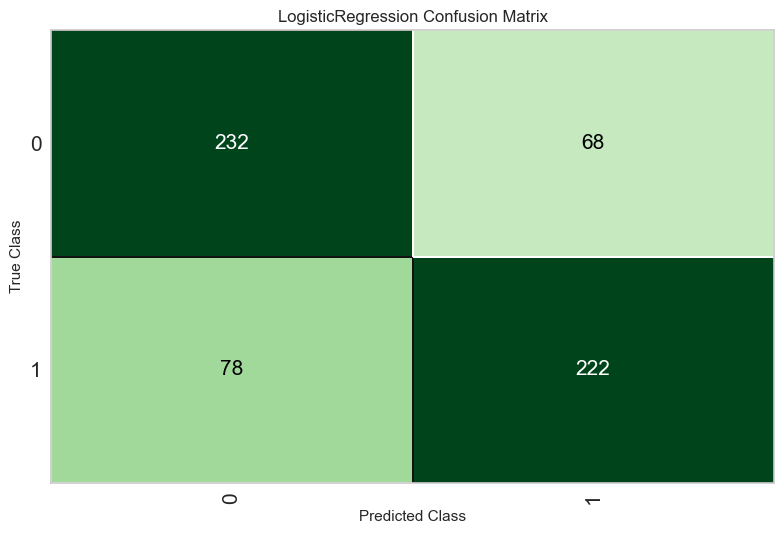

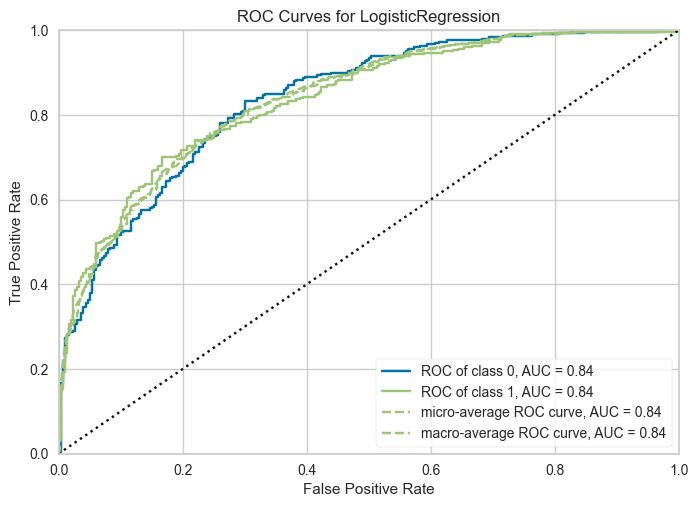

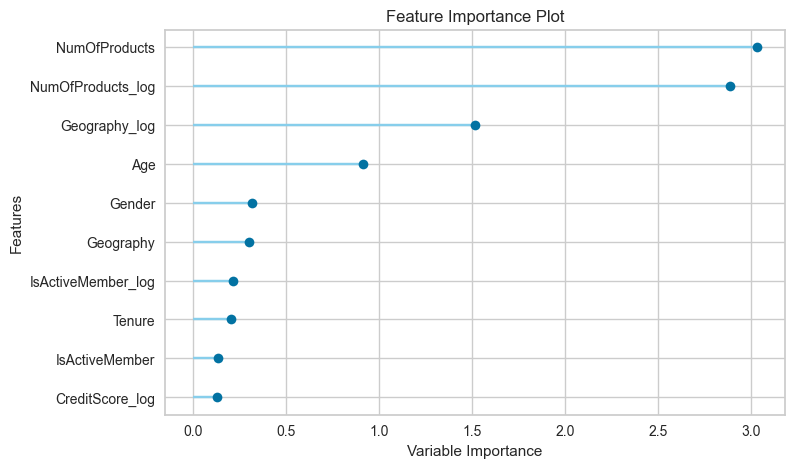

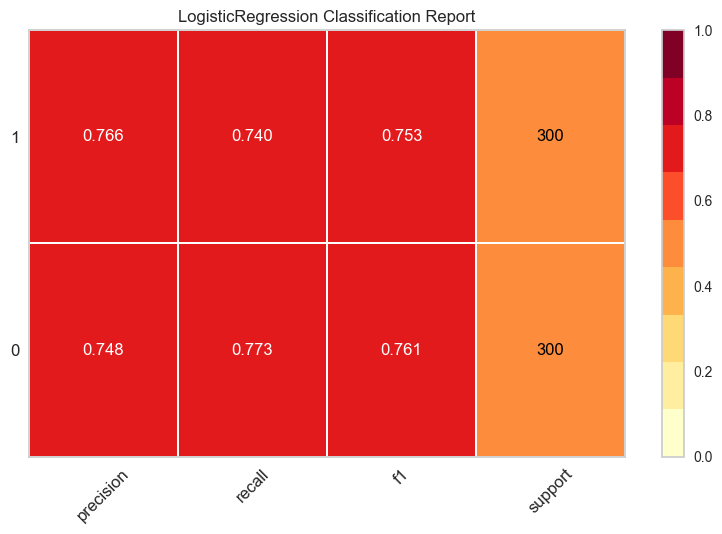

CreditScore  Geography    Gender       Age    Tenure   Balance  \
6519     0.183816   0.258076 -1.023271  1.135613 -0.375588  0.196822   
471      0.531034  -1.000832  0.977259 -0.305239 -1.397132  1.387126   
2793    -0.245100   0.258076  0.977259 -1.856925 -0.035073  2.493127   
8371     1.654386   0.258076 -1.023271 -1.191917 -0.035073 -0.014593   
2213    -1.562486   0.258076 -1.023271  0.138100 -0.375588 -0.608550   
...           ...        ...       ...       ...       ...       ...   
2072     0.939526  -1.000832  0.977259 -0.416074 -0.375588 -0.963134   
7970     2.032241  -1.000832  0.977259 -1.081082  0.305442 -0.643564   
1621     0.388062   1.516984  0.977259 -0.194404 -0.035073 -1.008382   
4361     1.327593   0.258076 -1.023271  0.913943  1.326985 -0.760801   
6708     1.051861  -1.000832  0.977259 -0.637743  0.645956 -0.963134   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
6519      -0.803548  -1.560906       -0.908195         1.106886  ...   
471       -0.803548   0.640654       -0.908195        -1.447770  ...   
2793      -0.803548   0.640654       -0.908195        -0.002334  ...   
8371      -0.803548  -1.560906       -0.908195         1.485302  ...   
2213       0.849843   0.640654        1.101086        -1.588899  ...   
...             ...        ...             ...              ...  ...   
2072       0.849843   0.640654        1.101086         1.536729  ...   
7970      -0.803548   0.640654        1.101086         1.499891  ...   
1621      -0.803548   0.640654        1.101086        -1.657697  ...   
4361      -0.803548   0.640654       -0.908195         0.376621  ...   
6708       0.849843   0.640654        1.101086        -0.666240  ...   

      Gender_log  Tenure_log  Balance_log  NumOfProducts_log  HasCrCard_log  \
6519         NaN   -0.470944     0.179670          -1.627339            NaN   
471     0.681711         NaN     0.870090          -1.627339       0.495095   
2793    0.681711   -0.035703     1.250797          -1.627339       0.495095   
8371         NaN   -0.035703    -0.014701          -1.627339            NaN   
2213         NaN   -0.470944    -0.937898           0.615101       0.495095   
...          ...         ...          ...                ...            ...   
2072    0.681711   -0.470944    -3.300454           0.615101       0.495095   
7970    0.681711    0.266541    -1.031602          -1.627339       0.495095   
1621    0.681711   -0.035703          NaN          -1.627339       0.495095   
4361         NaN    0.844574    -1.430462          -1.627339       0.495095   
6708    0.681711    0.498322    -3.300454           0.615101       0.495095   

      IsActiveMember_log  EstimatedSalary_log  Exited  prediction_label  \
6519           -2.388085             0.745211       1                 1   
471            -2.388085                  NaN       1                 1   
2793           -2.388085            -0.002337       0                 0   
8371           -2.388085             0.910394       1                 1   
2213            0.742454                  NaN       1                 0   
...                  ...                  ...     ...               ...   
2072            0.742454             0.930875       0                 0   
7970            0.742454             0.916247       0                 0   
1621            0.742454                  NaN       1                 0   
4361           -2.388085             0.319632       1                 1   
6708            0.742454            -1.097333       0                 0   

      prediction_score  
6519            0.9387  
471             0.5661  
2793            0.6852  
8371            0.6449  
2213            0.6433  
...                ...  
2072            0.9354  
7970            0.8522  
1621            0.6414  
4361            0.9128  
6708            0.9385  

[600 rows x 22 columns]

In [57]:
# train lr model
lr = create_model('lr')
plot_model(lr, plot = 'confusion_matrix')
plot_model(lr, plot = 'auc')
plot_model(lr, plot = 'feature')
plot_model(lr, plot = 'class_report')
predict_model(lr)

In [58]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

NameError: name 'lightgbm' is not defined